# Import & IO


In [1]:
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
def imOpen(imageFileName):
    return Image.open(imageFileName)

In [3]:
def imWrite(image, imageWritePath):
    image.save(imageWritePath, "JPEG")

In [4]:
def displayImage(image):
    plt.imshow(image, cmap="gray")

# Original Image

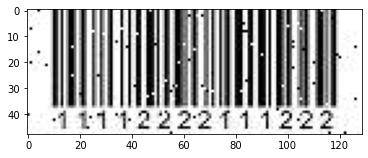

In [5]:
image = imOpen('BarCode2.jpg')
displayImage(image)

# Median Filter

In [6]:
def applyMedianFilter(image, kernalSize):
    filteredImage = image.copy()
    width = image.size[0]
    height = image.size[1]
    midStep = kernalSize // 2
    for y0 in range(midStep, height - midStep):
        for x0 in range(midStep, width - midStep):
            
            v = []
            for y in range(y0 - midStep, y0 + midStep + 1):
                for x in range(x0 - midStep, x0 + midStep + 1):
                    v.append(image.getpixel((x, y)))
            v.sort()
            median = v[len(v) // 2]
            
            filteredImage.putpixel((x0, y0), median)
    
    return filteredImage

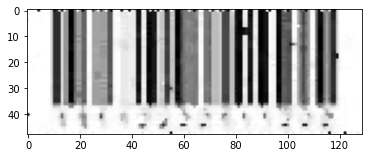

In [7]:
filteredImage = applyMedianFilter(image, 3)
imWrite(filteredImage, "BarCodeMedian.jpg")
displayImage(filteredImage)

# Weighted Median Filter

In [8]:
def applyWeightedMedianFilter(image, kernalSize, h):
    filteredImage = image.copy()
    width = image.size[0]
    height = image.size[1]
    midStep = kernalSize // 2
    for y0 in range(midStep, height - midStep):
        for x0 in range(midStep, width - midStep):
            
            v = []
            for y in range(y0 - midStep, y0 + midStep + 1):
                for x in range(x0 - midStep, x0 + midStep + 1):
                    reps = h[y - y0 + midStep][x - x0 + midStep]
                    for _ in range(reps):
                        v.append(image.getpixel((x, y)))
            v.sort()
            median = v[len(v) // 2]
            
            filteredImage.putpixel((x0, y0), median)
    
    return filteredImage

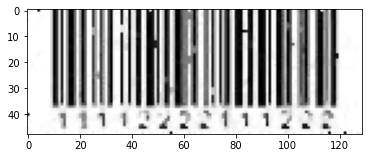

In [9]:
h = [
    [1, 3, 1],
    [3, 5, 3],
    [1, 3, 1]
]
filteredImage = applyWeightedMedianFilter(image, 3, h)
imWrite(filteredImage, "BarCodeWeightedMedian.jpg")
displayImage(filteredImage)

## Comment

**Which is better?**

The *weighted median* filter resulted in a better image.

**Comparison**

Both the median and the weighted median filters resulted in removing the noise, which is mainly impulse noise (salt and pepper). However, the median filter resulted in removing more details from the image which are not considered as noise, such as thin lines. Also, the median filter resulted in a more blurry image.

**Why?**

Weighted median filter preserved more of the details of the image, because the thin lines are more preserved due to the fact that the weighted median filter gives more weight to the central pixels, which means a higher probability of maintaining them.